## Homework 6: Image Classification with Pytorch

The homework consists of two parts: theoretical part and coding part.

 - All theoretical questions must be answered in your own words, do not copy-paste text from the internet. Points can be deducted for terrible formatting or incomprehensible English.
 - Code must be commented. If you use code you found online, you have to add the link to the source you used. There is no penalty for using outside sources as long as you convince us you understand the code.

**Note that coding part consists of two different notebooks.**

*Once completed zip the entire directory containing this exercise and upload it to https://courses.cs.ut.ee/2024/nn/spring/Main/Practices.*

## **Google colab introduction**

For HW6 and HW7 to make installations easier and to utilize GPU for your NN trainings you can use google colab.

Google Colab is a free, web-based tool that allows users to write and execute Python code in their browser. It is similar to Jupyter Notebook and provides a virtual machine with a GPU and pre-installed libraries, making it easy to set up and run complex code without having to install software locally. It also allows users to share and collaborate on code with others, making it a useful tool for students working on group projects or learning together.

## **Part 1: Theory Exercises**

These theoretical questions are about the material covered in the lecture about "Recurrent Neural Networks".

**Task 1.1:**

Recurrent networks: basic truths and architectures

Which of the following is true about recurrent neural networks. In case of ”True” bring
an example (e.g. suffices to refer to a slide in lecture), in case of ”False”, explain.


1. A recurrent network always produces one output prediction per timestep.

<font color='blue'>Answer for question 1</font>:

Yes, however it depends on a hidden state from a previous timestamp.

2. It is possible to put a convolutional layer between the input and the recurrent layer.

<font color='blue'>Answer for question 2</font>:

Yes, in NLP there's an emeddings layer before RNN input

3. The final layer (that makes the classification/regression) must be connected directly to the recurrent layer.

<font color='blue'>Answer for question 3</font>:

No, I assume we should be able to use any type of decoder archetecture.

4. In all RNNs types seen in the lecture, output produced at timestep t can only depend on inputs received at timesteps 0 to t, and not on future timesteps.

<font color='blue'>Answer for question 4</font>:

No, RNN rely on hidden state from previous timestamp (recurrence). It might be false for biderectional RNNs

5. All layers of a recurrent neural network are recurrent.

<font color='blue'>Answer for question 5</font>:

False, it's possible to include feed-forward layers or output layers that do not have recurrent connections.

6. Only one layer of the recurrent network can be recurrent (two recurrent layers would make no sense).

<font color='blue'>Answer for question 6</font>:

False, we can have multi layer RNN

7. The activations of the hidden nodes stay the same across all timesteps.

<font color='blue'>Answer for question 7</font>:

False, activations of hidden nodes change over timesteps as they depend on the input at each timestep and the previous state of the hidden nodes.



8. Different timesteps use the exact same weight matrices only in recurrent layers. This does not apply to other layers.

<font color='blue'>Answer for question 8</font>:

True, `b + W*ht-1 + U*xt`

Parameter sharing is not a requirement for other types of layers like feed-forward layers within the same network.

9. Different timesteps use the exact same weight matrices. This applies to all layers.

<font color='blue'>Answer for question 9</font>:

False, only RNN shares weights.

10. Gradient clipping is important to battle against gradients getting weaker and weaker.

<font color='blue'>Answer for question 10</font>:

11. LSTM networks deal with long term dependencies better than simple RNNs, because they have less parameters.

<font color='blue'>Answer for question 11</font>:

False, LSTM networks are better because they include mechanisms like gates (input, forget, and output) that effectively allow them to retain or forget information selectively over long sequences

12. The gates in LSTM are opened or closed depending on the current input and current hidden state and it does not matter which timestep it currently is.

<font color='blue'>Answer for question 12</font>:

True


13. I have trained my network to predict the weather on the 8th day based on the weather of previous 7 days. I now have weather from only past 5 days available. I can still use the same network to predict weather tomorrow (accuracy might be bad, but we can use fewer inputs without changing the network).

<font color='blue'>Answer for question 13</font>:

True, LSTM depends on the current input and the hidden state from the previous timestep, making it time-independent. However, we still need to have a meaningful previous hidden state.

14. I can train a recurrent network to receive input only at the first timestep and then produce arbitrarily long sequence of outputs.

<font color='blue'>Answer for question 14</font>:

## **Practical Exercises**

You've written a lot of code in this course to provide a whole host of neural network functionality. Dropout, Batch Norm, and 2D convolutions are some of the workhorses of deep learning in computer vision. You've also worked hard to make your code efficient and vectorized.

For the last part of the course, though, we're going to leave behind your beautiful codebase and instead migrate to a popular deep learning framework: [PyTorch](https://pytorch.org/). **PyTorch** is an open-source machine learning framework for Python. PyTorch is known for its dynamic computational graph, which allows for more flexibility and faster development, as well as its ability to run on both CPUs and GPUs.

### **Installation**

If you work with **google colab online**, everything you need from installation tutorial is to run the following line (that starts with !) which will install pytorch. After that you can jump to **Loading Data** section.


In [3]:
### For Google Colab runs only
!pip install torch torchvision

If you work with **Jupyter Notebook locally**, we recomend to create a separate environment for your neural network homeworks (if you didn't do it already). It is important now, since you can't have both tensorflow and pytorch in the same environment. If you installed tensorflow before, you need to uninstall it or create a separate environment for pytrorch.



**A reminder!**
Here are instructions to create a new Python environment with Anaconda and install PyTorch and Jupyter Notebook in that environment:

1. Open the terminal or Anaconda prompt by searching for it in the start menu.
2. Create a new environment by running the following command:

```
conda create --name myenv
```
You can replace "myenv" with the name of your choice for the environment.
3. Activate the new environment by running:

```
conda activate myenv
```
4. **Install PyTorch** and the Jupyter Notebook by running the following command:
```
conda install pytorch torchvision -c pytorch
```
To confirm the installation, you can check the version of PyTorch by running:
```
python -c "import torch; print(torch.__version__)"
```
If you created new environmen you should install other libraries that you used in previous homeworks too (numpy, pandas, matplotlib).
5. Now you can launch the Jupyter Notebook by running:
```
jupyter notebook
```
6. After you finished with homework to exit the conda environment in your terminal, you can use the command:
```
conda deactivate
```




If you had your neural networks existed environment just follow steps 3-6.

### **Loading Data**

PyTorch's *torchvision* package provides a collection of utility functions and datasets for computer vision tasks, like loading and transforming image and video datasets. The *torchvision.datasets* module includes popular datasets such as CIFAR, MNIST, etc. and it is a helpful tool for loading and transforming these datasets for use in training deep learning models.

When you first use a dataset, PyTorch will download the dataset from the internet and store it in a location specified by the *root* argument in the dataset class's constructor, so that the dataset can be reused in the future without re-downloading it.

In [4]:
from torchvision import datasets, transforms
import torch

# Load the CIFAR-10 dataset using torchvision
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Shorten the dataset for quicker training
# feel free to comment those out if you have GPU
train_data = torch.utils.data.Subset(train_data, range(25000))

print('Train data shape: ', len(train_data))
print('Test data shape: ', len(test_data))

Files already downloaded and verified
Files already downloaded and verified
Train data shape:  25000
Test data shape:  10000


After loading the CIFAR-10 dataset, let's use sklearn and do a train-validation split. After that we can create DataLoader objects with torchvision for the training and validation sets.

A **DataLoader** in PyTorch is a utility class that helps with loading and preprocessing datasets in a way that is efficient and easy to manage. It is an essential component of the PyTorch ecosystem, which helps with:
1. Batching: DataLoader allows you to easily create mini-batches of data for training or evaluation. This is crucial for training deep learning models, as processing the entire dataset at once can consume a large amount of memory and may not be feasible.

2. Shuffling: During training, DataLoader can shuffle the data, which helps to prevent the model from learning any specific order in the dataset. This improves the generalization capability of the model.

3. Parallelism: DataLoader supports parallel loading of data using multiple worker processes, which can speed up data loading and preprocessing, especially when working with large datasets.

4. Custom data handling: DataLoader works with custom Dataset classes that you define. This makes it easy to work with a wide variety of data sources and formats, and to apply custom preprocessing or augmentation.

5. Memory management: DataLoader handles memory management efficiently by loading data in chunks (batches) and allowing PyTorch to use its internal memory management system to optimize memory usage.

In [5]:
import torch.utils.data as data
from sklearn.model_selection import train_test_split

torch.manual_seed(0)

# Split the training data into training and validation sets
train_data_split, val_data_split = train_test_split(train_data, test_size=0.1)

# Create DataLoader objects for the training and validation sets
train_loader = data.DataLoader(train_data_split, batch_size=32, shuffle=True)
val_loader = data.DataLoader(val_data_split, batch_size=32, shuffle=False)

## First model in PyTorch

Before writing our first network with PyTorch, it is important to take a look at [documentation](https://pytorch.org/docs/stable/nn.html#convolution-layers) first.

For example, if we want to apply 2d Convolution layer take a look at [this page](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d) which has not only parameters explanations, but mathematical representation of layer and parameters and code usage example.

You can take a look at [Loss Functions](https://pytorch.org/docs/stable/nn.html#loss-functions).

Optimizers are called with [torch.optim](https://pytorch.org/docs/stable/optim.html?highlight=torch+optim#module-torch.optim) package which support various optimization algorithms.

Finally, there are some tutorials, such as [Build the neural network](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html).


In PyTorch, we define the model as a class inherited from *nn.Module* where we can define the layers and the forward method which defines the forward pass of the model.

**Task 2.1:**

Calculate output size after Conv2d layer which should be an input to next Linear layer.

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network model as a class that inherits from nn.Module
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        # Define the layers and their configurations
        self.conv1 = nn.Conv2d(3, 32, kernel_size=7, stride=2)
        self.act1 = nn.ReLU()
        self.flatten = nn.Flatten()

        ##############################################################################
        # TODO: Calculate output size after Conv2D layer. Use your knowledge from    #
        # hw5. output = (input + 2*padding - kernel) // stride + 1                   #
        ##############################################################################
        conv_output_size = ((32-7)//2+1) ** 2 * 32
        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################

        self.fc = nn.Linear(conv_output_size, 10)  # task to calculate the size
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Define the forward pass computations
        x = self.conv1(x)
        x = self.act1(x)
        x = self.flatten(x)
        x = self.fc(x)
        x = self.softmax(x)
        return x

In [15]:
# Instantiate the model
model = MyModel()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

# Print the model architecture
print(model)

MyModel(
  (conv1): Conv2d(3, 32, kernel_size=(7, 7), stride=(2, 2))
  (act1): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=5408, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


**Task 2.2:**

Why accuracy cannot be used as a loss function?

**Your answer:**

Accuracy function is non-differentiable.

Let's create training and validation functions

In [16]:
def train(model, train_loader, criterion, optimizer, device):
    """
    Function that trains a model using the provided DataLoader, loss function (criterion), and optimizer.
    It iterates through the mini-batches in the DataLoader, computes the model's output, calculates the loss, and updates the model's parameters using the optimizer.
    """
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)  # Move the inputs and targets to the device

        optimizer.zero_grad()  # Zero the gradients of the model's parameters

        outputs = model(inputs)  # Compute the model's output
        loss = criterion(outputs, targets)  # Calculate the loss

        loss.backward()  # Compute the gradients of the loss with respect to the model's parameters
        optimizer.step()  # Update the model's parameters using the optimizer

        running_loss += loss.item()  # Accumulate the loss

    return running_loss / len(train_loader)  # Return the average loss per mini-batch

In [17]:
def validate(model, val_loader, criterion, device):
    """
    Function that evaluates a model on a validation dataset using the provided DataLoader and loss function (criterion).
    """
    model.eval()  # Set the model to evaluation mode
    running_loss = 0.0

    with torch.no_grad():  # Disable gradient computation during validation
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)  # Move the inputs and targets to the device

            outputs = model(inputs)  # Compute the model's output
            loss = criterion(outputs, targets)  # Calculate the loss

            running_loss += loss.item()  # Accumulate the loss

    return running_loss / len(val_loader)  # Return the average loss per mini-batch

In [18]:
def calculate_accuracy(model, data_loader, device):
    """A function that calculate the accuracy of a model"""
    model.eval()  # Set the model to evaluation mode

    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient calculation during accuracy calculation
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate the overall accuracy
    accuracy = correct / total

    return accuracy

Now, we have all components to train the network.

In [19]:
torch.manual_seed(0)

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the device
model = model.to(device)

# Define the number of epochs
num_epochs = 5
batch_size = 32

history = {
    'train_loss': [],
    'val_loss': [],
    'train_accuracy': [],
    'val_accuracy': []
}

# Training loop
for epoch in range(num_epochs):
    # Train the model
    train_loss = train(model, train_loader, criterion, optimizer, device)
    history['train_loss'].append(train_loss)
    # Calculate train accuracy
    train_accuracy = calculate_accuracy(model, train_loader, device)
    history["train_accuracy"].append(train_accuracy)

    # Validate the model
    val_loss = validate(model, val_loader, criterion, device)
    history['val_loss'].append(val_loss)
    # Calculate validation accuracy
    val_accuracy = calculate_accuracy(model, val_loader, device)
    history["val_accuracy"].append(val_accuracy)

    # Print the results for this epoch
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f} | Validation Loss: {val_loss:.4f}")

Epoch 1/5
Train Loss: 2.2723 | Validation Loss: 2.2309
Epoch 2/5
Train Loss: 2.2012 | Validation Loss: 2.1743
Epoch 3/5
Train Loss: 2.1654 | Validation Loss: 2.1484
Epoch 4/5
Train Loss: 2.1441 | Validation Loss: 2.1277
Epoch 5/5
Train Loss: 2.1296 | Validation Loss: 2.1148


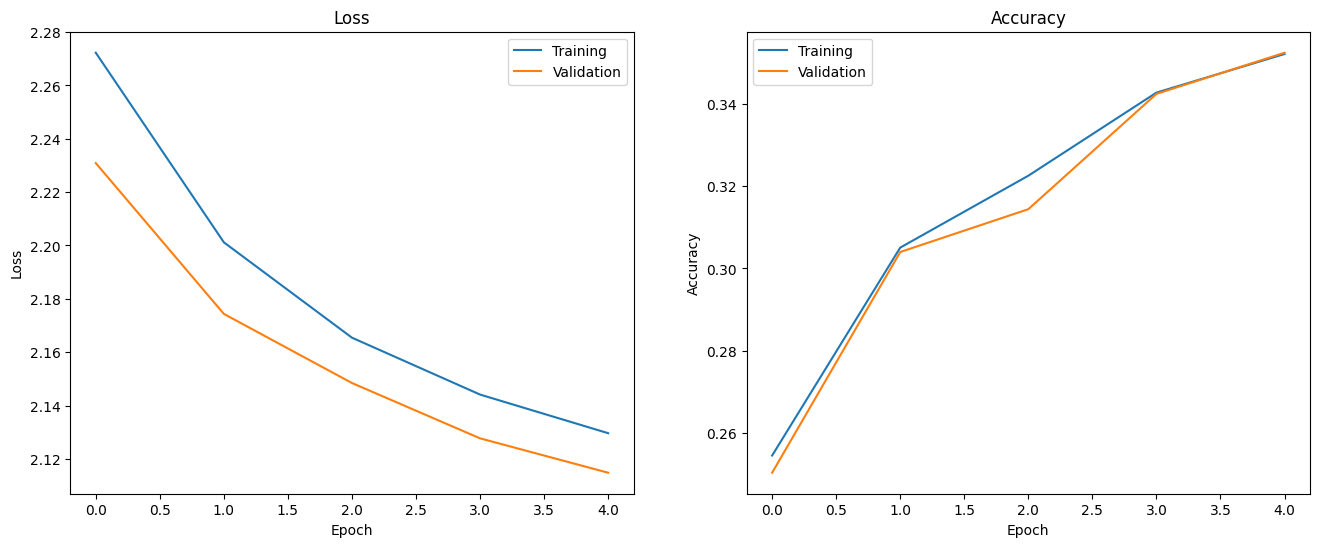

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history["train_loss"])
plt.plot(history["val_loss"])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history["train_accuracy"])
plt.plot(history["val_accuracy"])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')

plt.show()

**Task 2.3:**

Why training set accuracy is lower than validation set accuracy in the first epochs? Hint: training accuracy is an average over all training batches in epoch. When is validation accuracy calculated?

**Your answer:**

 According to the plot, validation accuracy is lower compare to train set accuracy.

 Initial weights are randomly initialized, so results during first few epochs are hard to predict.

In [21]:
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64)

test_accuracy = calculate_accuracy(model, test_loader, device)
print("Test set accuracy:", test_accuracy)

Test set accuracy: 0.3516


### Data Normalization

neural networks work better with normalized inputs, which are around 0 (the most effective region of activation function).

We are going to try out three different normalization methods:
 - **centering** (subtracting the mean),
 - **standardization** (subtract mean and divide by standard deviation),
 - **minmax** (subtract min and divide by max-min).

For images it is sufficient to calculate statistcs for each color channel, e.g. you take mean over entire training set and also over all pixel positions. **NB**! The statistics (mean, standard deviation, min/max) must be always calculated on training set and the same values must be applied to validation and test set.

In PyTorch normalization step is usually applyied before putting data in the dataloader. Uou can use the transforms module from the `torchvision` library to apply normalization. You would typically create a `transforms.Compose` object that includes normalization and other data augmentation steps. You can check back how we performed data normalization while reading CIFAR. Or here is another example:



In [22]:
from torchvision import transforms

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Apply the normalization when loading your dataset
train_data_normalized = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_data_normalized = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


**Important note!** In Keras (with TensorFlow backend), the default format for image data is channels-last, which means the shape of the input data is (batch_size, height, width, channels). However, in **PyTorch**, the default format for image data is channels-first, which means the shape of the input data should be `(batch_size, channels, height, width)`.

### More elaborate network

Create a network with following layers:
1. 3x3 convolution with 32 filters, stride 1, padding 1
2. batch normalization
3. relu
4. 3x3 convolution with 32 filters, stride 1, padding 0
5. batch normalization
6. relu
7. max pooling 2x2
8. dropout 0.25
7. flatten
8. Linear 64
5. batch normalization
6. relu
8. dropout 0.5
8. Linear 10
9. softmax

**Task 2.4:**

Understanding dropout

In PyTorch, is the dropout probability interpreted as probability of keeping each node or probability of dropping?

**Your answer:**

In PyTorch `p` is probability of dropping, because it's probability of an element to be zeroed.

**Task 2.5:**

Create a network with given layers and calculate the intermediate shapes.

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network model as a class that inherits from nn.Module
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        ##############################################################################
        # TODO: Take absolute values of the gradients and maximum over channels.     #
        ##############################################################################
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=0)
        self.bn2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(0.25)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(15*15*32, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.relu3 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)
        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.dropout1(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

In [24]:
model = MyModel()
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Print the model architecture
print(model)

MyModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.25, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=7200, out_features=64, bias=True)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


Be prepared that this training will take longer time than previous one. It's best to use GPU here, that's why keep in mind that you have an option to use google colab.

In [25]:
# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the device
model = model.to(device)

# Define the number of epochs
num_epochs = 5
batch_size = 64

history = {
    'train_loss': [],
    'val_loss': [],
    'train_accuracy': [],
    'val_accuracy': []
}

# Training loop
for epoch in range(num_epochs):
    # Train the model
    train_loss = train(model, train_loader, criterion, optimizer, device)
    history['train_loss'].append(train_loss)
    # Calculate train accuracy
    train_accuracy = calculate_accuracy(model, train_loader, device)
    history["train_accuracy"].append(train_accuracy)

    # Validate the model
    val_loss = validate(model, val_loader, criterion, device)
    history['val_loss'].append(val_loss)
    # Calculate validation accuracy
    val_accuracy = calculate_accuracy(model, val_loader, device)
    history["val_accuracy"].append(val_accuracy)

    # Print the results for this epoch
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f} | Validation Loss: {val_loss:.4f}")

Epoch 1/5
Train Loss: 2.0644 | Validation Loss: 1.9355
Epoch 2/5
Train Loss: 1.9376 | Validation Loss: 1.8712
Epoch 3/5
Train Loss: 1.8926 | Validation Loss: 1.8361
Epoch 4/5
Train Loss: 1.8684 | Validation Loss: 1.8393
Epoch 5/5
Train Loss: 1.8495 | Validation Loss: 1.8320


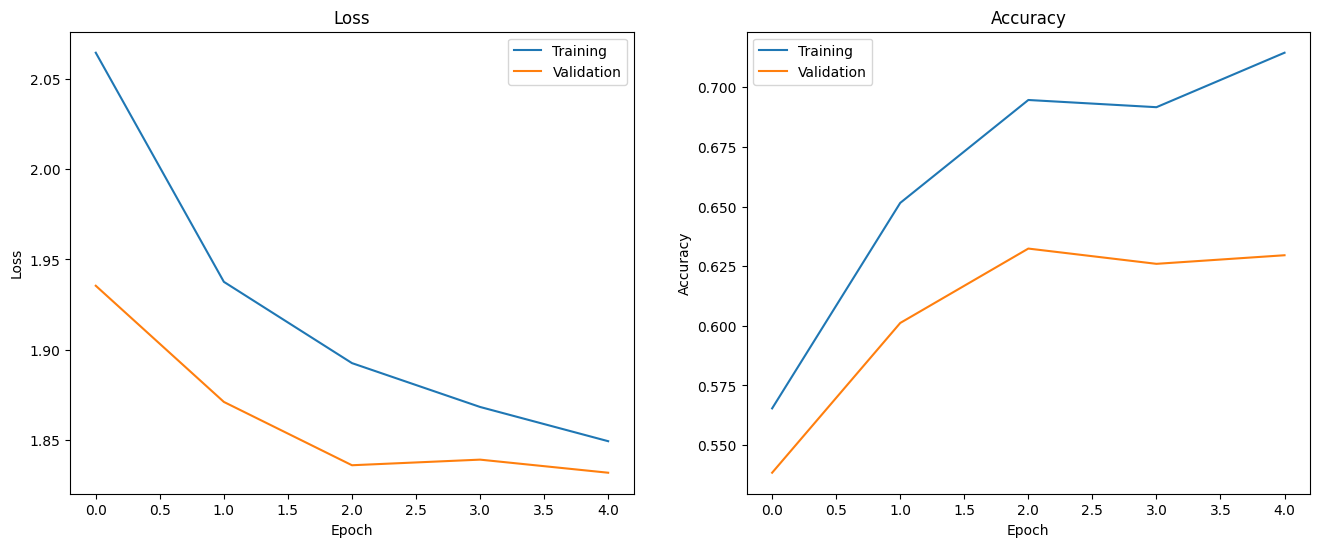

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history["train_loss"])
plt.plot(history["val_loss"])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history["train_accuracy"])
plt.plot(history["val_accuracy"])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')

plt.show()

## Feature extraction

Model trained for classification can be used in other creative ways, for example finding similar images.The hidden layer activations can be thought of as features extracted from the images. As the final goal is to classifiy images into categories, we can assume that in the last layers the features of semantically similar images are similar. That means they are close to each other according to Euclidean distance.


When choosing which layer features to use `Linear(64)` layer seems like a good pick - it is positioned late in the network (close to output), meaning the features should reflect the semantic meaning relatively well. Also, it has sensible dimensions - 64. We create a new model that outputs not the classification, but the `Linear(64)` layer features. We can now use `predict()` to produce features of the entire test set.

In [27]:
import numpy as np

# Define a custom FeatureExtractor class that inherits from nn.Module
class FeatureExtractor(nn.Module):
    def __init__(self, base_model):
        super(FeatureExtractor, self).__init__()
        # Create a sequential model using layers from the base_model up to first Linear
        self.features = nn.Sequential(
            base_model.conv1,
            base_model.bn1,
            base_model.relu1,
            base_model.conv2,
            base_model.bn2,
            base_model.relu2,
            base_model.pool,
            base_model.dropout1,
            base_model.flatten,
            base_model.fc1
        )

    # Define the forward pass for the feature extractor
    def forward(self, x):
        return self.features(x)

# Set up the DataLoader for the test dataset
testloader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False, num_workers=2)

# Instantiate the FeatureExtractor with the base model and move it to the device (GPU/CPU)
extract_model = FeatureExtractor(model).to(device)

# Initialize a list to store the extracted features
test_extracted_features = []

# Loop through the test dataset without calculating gradients (speeds up the process)
with torch.no_grad():
    for i, data in enumerate(testloader, 0):
        # Get the inputs and labels from the test dataset
        inputs, labels = data
        # Move the inputs to the device (GPU/CPU)
        inputs = inputs.to(device)
        # Pass the inputs through the feature extractor and move the results to CPU as a NumPy array
        features_batch = extract_model(inputs).cpu().numpy()
        test_extracted_features.append(features_batch)

# Stack the extracted features into a single NumPy array
test_extracted_features = np.vstack(test_extracted_features)
print(test_extracted_features.shape)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


(10000, 64)


**Task 2.6:**

Calculate euclidean distance matrix between test set images.

In [28]:
##############################################################################
# TODO: Calculate euclidean distance matrix between test set images higher   #
# level features that are extracted from the model.                          #
# You can either use code from the first homework or scipy squareform.       #
##############################################################################
from scipy.spatial.distance import pdist, squareform

dists = squareform(pdist(test_extracted_features, 'euclidean'))

print(dists.shape)
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

(10000, 10000)


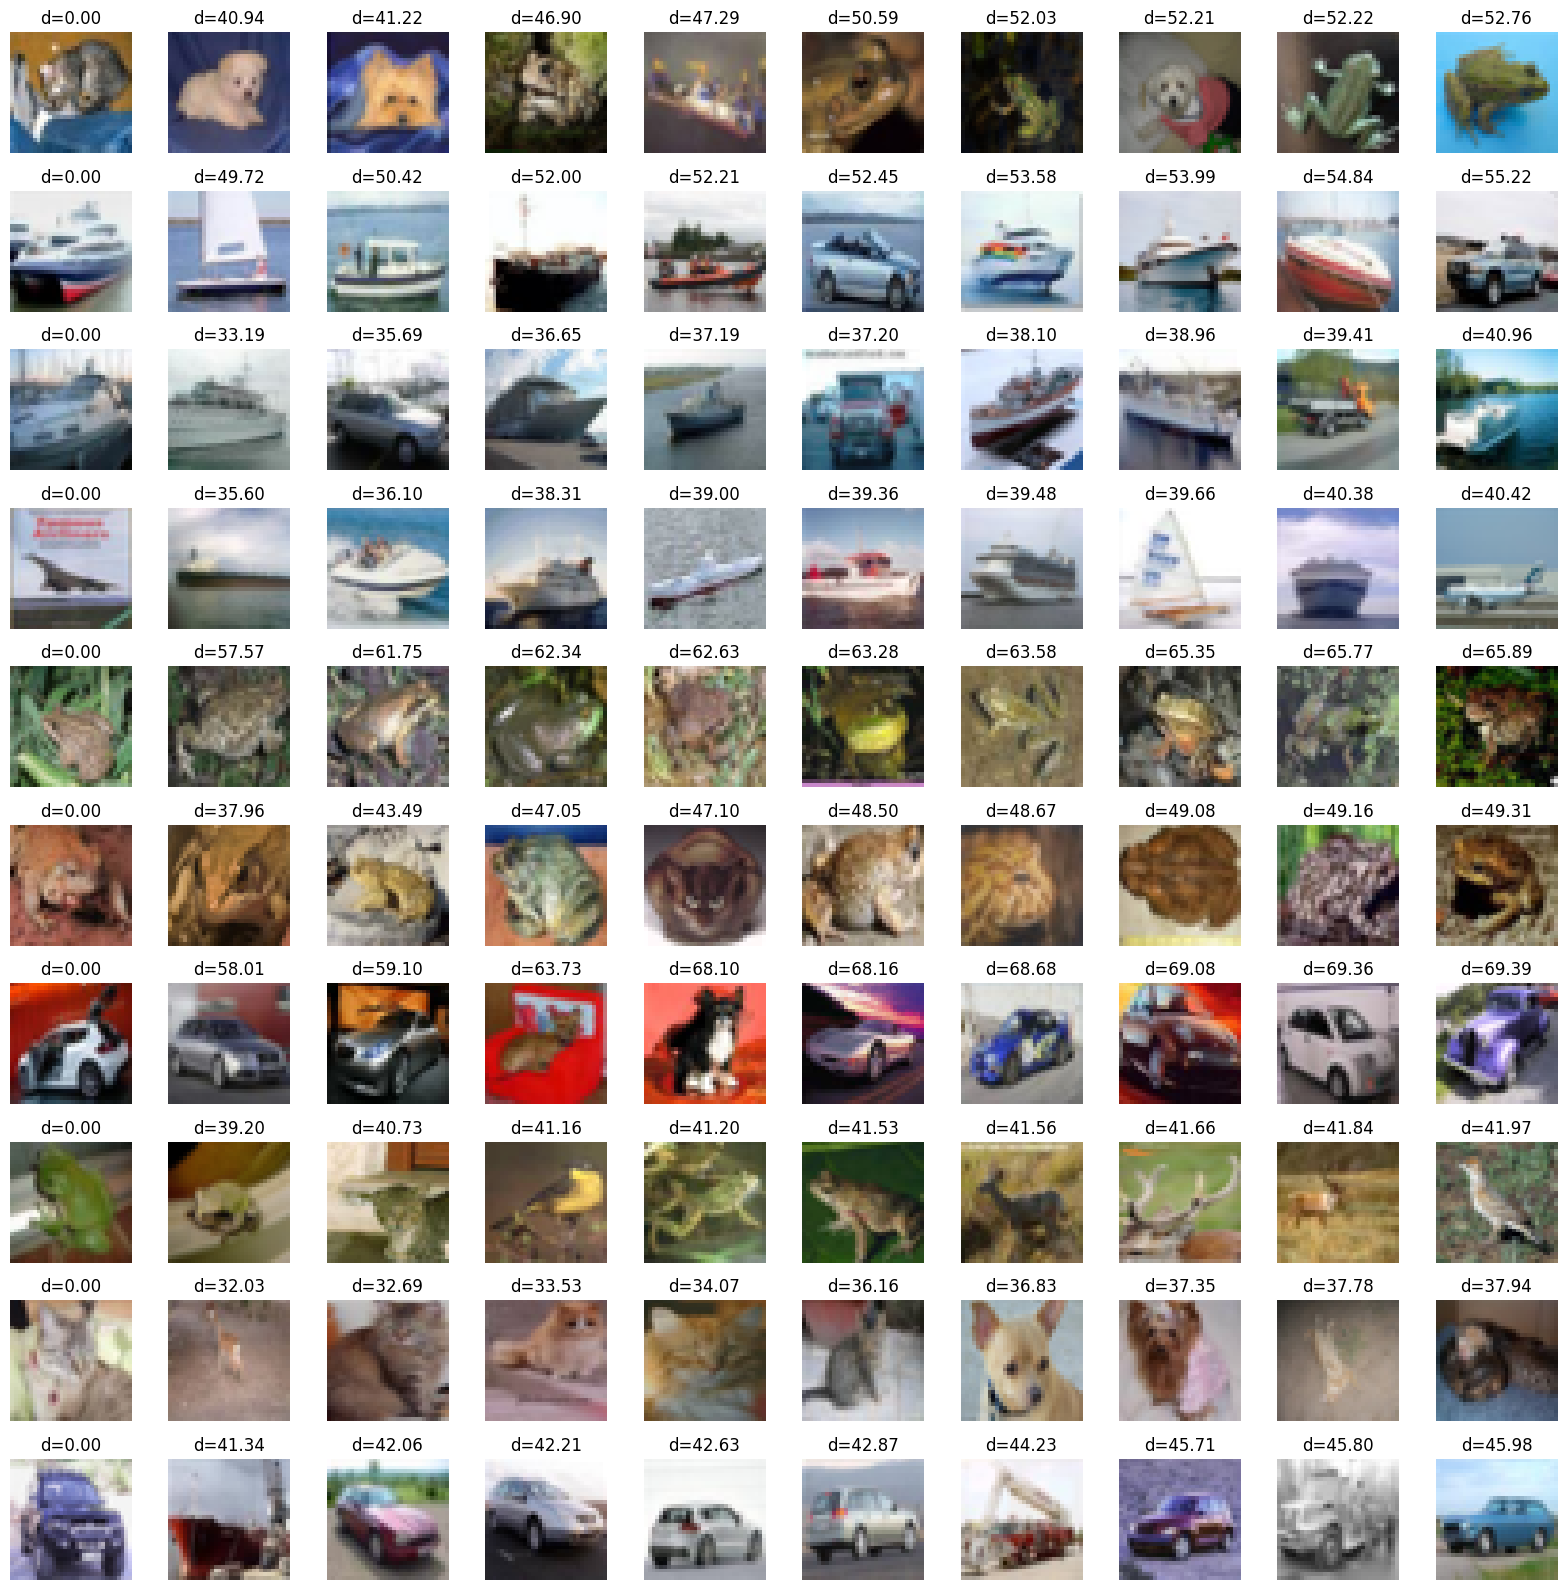

In [29]:
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

plt.figure(figsize=(16, 16))
for i in range(10):
    closest = np.argsort(dists[i])[:10]
    for k, j in enumerate(closest):
        plt.subplot(10, 10, i * 10 + k + 1)
        plt.imshow(to_pil_image(test_data[j][0] * 0.5 + 0.5))  # denormalize the image
        plt.axis('off')
        plt.title("d=%0.2f" % dists[i, j])
plt.tight_layout()
plt.show()

**Task 2.7:**

Describe the results. Describe the mistakes it makes. A nearest-neighbour search on the input images would simply return images with most similar pixel values, how are these results different?  

**Your answer:**